In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import math
import random
import re
import importlib
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
with open('../data/text-1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [92]:
import DataLoader
importlib.reload(DataLoader)

<module 'DataLoader' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\DataLoader.py'>

In [93]:
dataLoader = DataLoader.DataLoader(rawText=text)

In [78]:
import MLP
importlib.reload(MLP)

<module 'MLP' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\MLP.py'>

In [106]:
ctxLen = 20
model = MLP.MLP(
    numOfTokens=dataLoader.numOfTokens,
    ctxLen=ctxLen,
    embSize=32,
    char2int=dataLoader.char2int,
    int2char=dataLoader.int2char
)

In [80]:
import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\utils.py'>

numOfParams=9,131,848


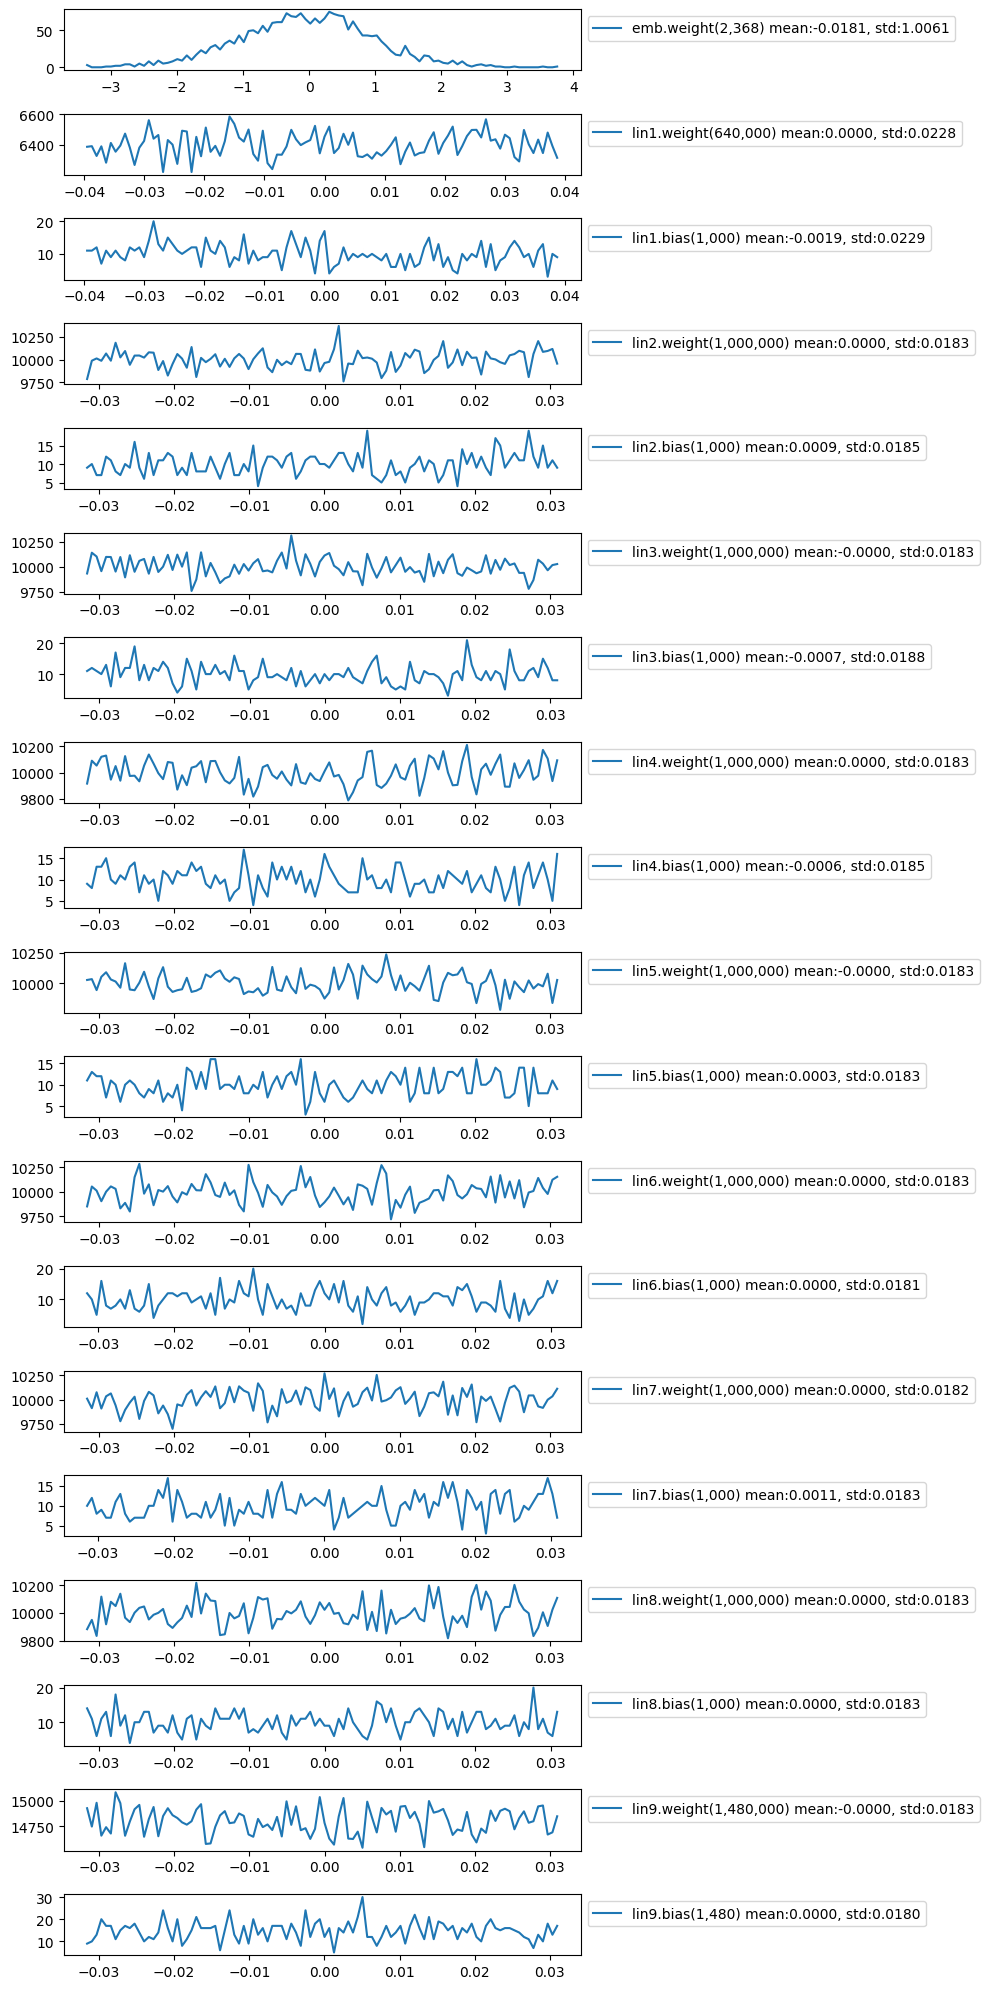

In [107]:
numOfParams = sum(p.numel() for p in model.parameters())
print(f'{numOfParams=:,}')
# showParamsStats(model, figsize=(10,20), layerNameFilter=re.compile('^lin.*weight$'))
utils.showParamsStats(model, figsize=(10,20))

In [115]:
ints = model.generate(dataLoader.strToInts('On his return to Spain he found ').unsqueeze(0),100)
dataLoader.intsToStr(ints[0])

'on his return to spain he found  fleme verfeteg  atey chaingitot oy are toret,” will eeceroef and as whe  “ielidr,rand thonds oued f'

In [98]:
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\utils.py'>

In [109]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [110]:
utils.trainLoop(
    epochNum=10,
    batchesPerEpoch=100,
    batchSize=32,
    model=model,
    optimizer=optimizer,
    dataLoader=dataLoader
)

epoch:0, trLoss=0.4746, valLoss=0.8145
epoch:1, trLoss=0.1578, valLoss=0.3463
epoch:2, trLoss=0.1225, valLoss=0.2460
epoch:3, trLoss=0.1007, valLoss=0.1966
epoch:4, trLoss=0.0954, valLoss=0.1711
epoch:5, trLoss=0.0957, valLoss=0.1620
epoch:6, trLoss=0.0895, valLoss=0.1584
epoch:7, trLoss=0.0872, valLoss=0.1554
epoch:8, trLoss=0.0868, valLoss=0.1533
epoch:9, trLoss=0.0856, valLoss=0.1454
